### Predecir si un caso es de alto riesgo y requiere una atención inmediata en función de diversas características.

## Importacion de librerias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, confusion_matrix,classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE



## Preparación y Transformación de los Datos

In [20]:
# Cargar el dataset transformado con anterioridad
df = pd.read_csv('linea137_1_transformada.csv')

# Eliminar filas con valores nulos si es necesario
df.dropna(inplace=True)

df_modificado=df
# Eliminar columnas irrelevantes
columnas = {'victima_embarazo', 'victima_nacionalidad', 'victima_discapacidad', 'intervencion_fecha','intervencion_hora'}
df_modificado.drop(columns=columnas, inplace=True)

print(df_modificado)

       caso_id  victima_edad victima_genero        violencia_tipo  \
0     361490.0          70.0       Femenino                Sexual   
1     361470.0          18.0      Masculino                Física   
2     361470.0          15.0      Masculino           Psicológica   
3     361490.0          15.0      Masculino           Psicológica   
4     121995.0          14.0      Masculino                Física   
...        ...           ...            ...                   ...   
3399  458515.0           2.0       Femenino           Psicológica   
3400  458515.0          28.0       Femenino  Física y psicológica   
3401  458624.0          16.0      Masculino           Psicológica   
3403  458915.0          39.0       Femenino  Física y psicológica   
3404  459497.0          20.0      Masculino           Psicológica   

     agresor_relacion_victima  
0                      Pareja  
1                   Padrastro  
2                   Padrastro  
3                    Abuelo/a  
4          

In [21]:
# Codificación de variables categóricas
categorical_columns = ['victima_genero', 'violencia_tipo', 'agresor_relacion_victima']

# DESCARTADO
#for col in categorical_columns:
#    le = LabelEncoder()
#    df_modificado[col] = le.fit_transform(df_modificado[col])

print("Columnas antes del dummies:\n")
df_modificado.info()
df_modificado = pd.get_dummies(df_modificado, columns=categorical_columns)
print("\n\nColumnas despues del dummies:\n")
df_modificado.info()


Columnas antes del dummies:

<class 'pandas.core.frame.DataFrame'>
Index: 3067 entries, 0 to 3404
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   caso_id                   3067 non-null   float64
 1   victima_edad              3067 non-null   float64
 2   victima_genero            3067 non-null   object 
 3   violencia_tipo            3067 non-null   object 
 4   agresor_relacion_victima  3067 non-null   object 
dtypes: float64(2), object(3)
memory usage: 143.8+ KB


Columnas despues del dummies:

<class 'pandas.core.frame.DataFrame'>
Index: 3067 entries, 0 to 3404
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   caso_id                                                 3067 non-null   float64
 1   victima_edad                        

In [ ]:
# Cantidad de datos donde 'victima_edad' es menor a 23
cantidad_edad = df_modificado[df_modificado['victima_edad'] < 23].shape[0]
print(f'Cantidad de datos con edad menor a 23: {cantidad_edad}')

# Cantidad de datos donde 'victima_genero_Femenino' es True
cantidad_genero = df_modificado[df_modificado['victima_genero_Femenino'] == True].shape[0]
print(f'Cantidad de datos con género femenino: {cantidad_genero}')

# Cantidad de datos donde 'agresor_relacion_victima_Pareja' es True
cantidad_pareja = df_modificado[df_modificado['agresor_relacion_victima_Pareja'] == True].shape[0]
print(f'Cantidad de datos con agresor en la relación de pareja: {cantidad_pareja}')

# Cantidad de datos donde 'agresor_relacion_victima_Padre' es True
cantidad_padre = df_modificado[df_modificado['agresor_relacion_victima_Padre'] == True].shape[0]
print(f'Cantidad de datos con agresor en la relación de padre: {cantidad_padre}')

# Cantidad de datos donde 'violencia_tipo_Física' es True
cantidad_fisica = df_modificado[df_modificado['violencia_tipo_Física'] == True].shape[0]
print(f'Cantidad de datos con violencia física: {cantidad_fisica}')

# Cantidad de datos donde 'violencia_tipo_Psicológica' es True
cantidad_psicologica = df_modificado[df_modificado['violencia_tipo_Psicológica'] == True].shape[0]
print(f'Cantidad de datos con violencia psicológica: {cantidad_psicologica}')

# Cantidad de datos donde 'violencia_tipo_Física y psicológica' es True
cantidad_fisica_psicologica = df_modificado[df_modificado['violencia_tipo_Física y psicológica'] == True].shape[0]
print(f'Cantidad de datos con violencia física y psicológica: {cantidad_fisica_psicologica}')


# Crear la columna 'alto_riesgo' basado en condiciones lógicas
# 1 indica "alto riesgo"
# 0 indica "bajo riesgo"

df_modificado['alto_riesgo'] = np.where(
    (df_modificado['victima_edad'] < 23) &
    (df_modificado['victima_genero_Femenino'] == True) &  
    ((df_modificado['agresor_relacion_victima_Pareja'] == True) |  
     (df_modificado['agresor_relacion_victima_Padre'] == True)) &
    ((df_modificado['violencia_tipo_Física'] == True) |  
    (df_modificado['violencia_tipo_Psicológica'] == True) | 
    (df_modificado['violencia_tipo_Física y psicológica'] == True)),
    1, 0)

# Verificamos la distribución de la nueva variable
print("Distribución de alto riesgo:")
df_modificado['alto_riesgo'].value_counts()

Cantidad de datos con edad menor a 23: 1697
Cantidad de datos con género femenino: 2148
Cantidad de datos con agresor en la relación de pareja: 1042
Cantidad de datos con agresor en la relación de padre: 1026
Cantidad de datos con violencia física: 1307
Cantidad de datos con violencia psicológica: 1030
Cantidad de datos con violencia física y psicológica: 372
Distribución de alto riesgo:


alto_riesgo
1    3056
0      11
Name: count, dtype: int64

# División de los datos en entrenamiento y prueba


In [23]:
X = df_modificado.drop('alto_riesgo', axis=1)  # Eliminar la columna 'alto_riesgo' de las características, asi solo tener variables independientes
Y = df_modificado['alto_riesgo']  # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2, random_state=42)

# Aplicar SMOTE para el sobremuestreo de la clase minoritaria en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampleo, y_train_resampleo = smote.fit_resample(X_TRAIN, Y_TRAIN)

# Imprimir las dimensiones de los conjuntos para verificar
print(f"Tamaño de X_TRAIN: {X_TRAIN.shape}")
print(f"Tamaño de X_TEST: {X_TEST.shape}")
print(f"Tamaño de Y_TRAIN: {Y_TRAIN.shape}")
print(f"Tamaño de Y_TEST: {Y_TEST.shape}")
print(f"Tamaño de X_train_resampleo: {X_train_resampleo.shape}")
print(f"Tamaño de y_train_resampleo: {y_train_resampleo.shape}")

Tamaño de X_TRAIN: (2453, 33)
Tamaño de X_TEST: (614, 33)
Tamaño de Y_TRAIN: (2453,)
Tamaño de Y_TEST: (614,)
Tamaño de X_train_resampleo: (3950, 33)
Tamaño de y_train_resampleo: (3950,)


## Ver la distribución real de clases (Y)

In [24]:
# Distribución de clases en el conjunto original
unique, counts = np.unique(Y, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Clase {u}: {c} casos")

unique, counts = np.unique(y_train_resampleo, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Clase {u}: {c} casos")

Clase 0: 2483 casos
Clase 1: 584 casos
Clase 0: 1975 casos
Clase 1: 1975 casos


# Entrenamiento y prediccion

In [25]:

# Entrenamiento del modelo con los datos de entrenamiento.
modelo = RandomForestClassifier(class_weight='balanced', random_state=42)
# Pasamos tanto las características como la variable objetivo, para que el modelo pueda aprender.
modelo.fit(X_train_resampleo, y_train_resampleo)

# Predicción con los datos de prueba
Y_pred = modelo.predict(X_TEST)

print("Predicciones del modelo:")
print(Y_pred)

print("Comparación con las etiquetas reales:")
print(f"Etiquetas reales: {Y_TEST.values}")

Predicciones del modelo:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0


# Evaluación del rendimiento del modelo

Exactitud del modelo: 1.0000

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       106

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



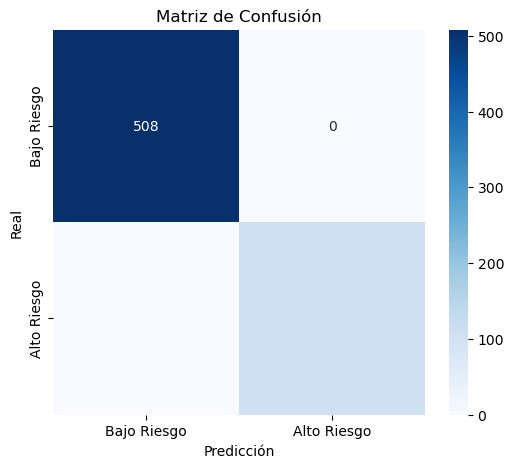

In [26]:

# 1. Accuracy Score



accuracy = accuracy_score(Y_TEST, Y_pred)
print(f'Exactitud del modelo: {accuracy:.4f}')

# Informe de clasificación (precision, recall, f1-score, etc.)

precision = precision_score(Y_TEST, Y_pred)
recall = recall_score(Y_TEST, Y_pred)
f1 = f1_score(Y_TEST, Y_pred)
cm = confusion_matrix(Y_TEST, Y_pred)

print("\nInforme de clasificación:")
print(classification_report(Y_TEST, Y_pred))



# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bajo Riesgo', 'Alto Riesgo'], yticklabels=['Bajo Riesgo', 'Alto Riesgo'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()